### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

#### 🚨 데이터 탐색

In [2]:
import pandas as pd

path = "./datasets/customer_order_data.csv"
cp_df = pd.read_csv(path, sep=",")

display(cp_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [3]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


#### 🚨 중복행 검사

In [4]:
cp_df.duplicated().sum()

0

#### 🚨 결측치 검사

In [5]:
cp_df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

#### 🚨 데이터 전처리
- PurchaseDate (구매날짜)를 최신순으로 정렬하기
- CustomerID, OrderID가 중복이 있는지 검사
- ProductInformation (상품정보) 앞의 Product 를 빼기
- TransactionAmount 를 Payment , ProductInformation 를 Product 로 컬럼명 바꾸기

In [6]:
# PurchaseDate (구매날짜)를 최신순으로 정렬하기
cp_df = cp_df.sort_values(by=['PurchaseDate'], ascending=False)
# 최신순 정렬로 데이터 저장
cp_df
# 인덱스 초기화
cp_df = cp_df.reset_index(drop=True)
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,4759,2023-06-10,804.28,Product D,467544,New York
1,6570,2023-06-10,125.84,Product C,664032,Paris
2,6761,2023-06-10,571.97,Product B,690462,London
3,3213,2023-06-10,700.65,Product B,719531,Tokyo
4,2625,2023-06-10,765.11,Product B,377501,New York
...,...,...,...,...,...,...
995,2188,2023-04-11,463.70,Product A,176819,London
996,8483,2023-04-11,375.23,Product C,691194,Paris
997,8317,2023-04-11,272.56,Product B,826847,New York
998,6911,2023-04-11,433.33,Product C,963918,Tokyo


In [7]:
# CustomerID가 중복이 있는지 검사
duplicates = cp_df.duplicated(subset=['CustomerID'], keep=False)
print(duplicates.any())
# 중복 있음 같은 고객이 여러번 주문했음을 알 수 있다.

True


In [8]:
duplicates = cp_df.duplicated(subset=['OrderID'], keep=False)
print(duplicates.any())
# OrderID 는 중복이 없다. 1주문당 고유 OrderID 1개 있음 확인

False


In [9]:
# 컬럼 안에 이름 바꾸기
cp_df['ProductInformation'] = cp_df['ProductInformation'].replace(['Product A', 'Product B', 'Product C', 'Product D'], ['A', 'B', 'C', 'D'])
# 확인
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,4759,2023-06-10,804.28,D,467544,New York
1,6570,2023-06-10,125.84,C,664032,Paris
2,6761,2023-06-10,571.97,B,690462,London
3,3213,2023-06-10,700.65,B,719531,Tokyo
4,2625,2023-06-10,765.11,B,377501,New York
...,...,...,...,...,...,...
995,2188,2023-04-11,463.70,A,176819,London
996,8483,2023-04-11,375.23,C,691194,Paris
997,8317,2023-04-11,272.56,B,826847,New York
998,6911,2023-04-11,433.33,C,963918,Tokyo


In [10]:
# 컬럼명 바꾸기
cp_df = cp_df.rename(columns={'TransactionAmount': 'Payment', 'ProductInformation': 'Product'})
# 확인
cp_df

,CustomerID,PurchaseDate,Payment,Product,OrderID,Location
0,4759,2023-06-10,804.28,D,467544,New York
1,6570,2023-06-10,125.84,C,664032,Paris
2,6761,2023-06-10,571.97,B,690462,London
3,3213,2023-06-10,700.65,B,719531,Tokyo
4,2625,2023-06-10,765.11,B,377501,New York
...,...,...,...,...,...,...
995,2188,2023-04-11,463.70,A,176819,London
996,8483,2023-04-11,375.23,C,691194,Paris
997,8317,2023-04-11,272.56,B,826847,New York
998,6911,2023-04-11,433.33,C,963918,Tokyo


In [11]:
from datetime import datetime

# 데이터프레임의 PurchaseDate 열을 datetime 형식으로 변환
cp_df['PurchaseDate'] = pd.to_datetime(cp_df['PurchaseDate'])

# 현재 날짜와 시간 가져오기
current_datetime = pd.Timestamp(datetime.now())

# 각 행의 PurchaseDate와 현재 날짜 간의 차이를 계산하여 새로운 열에 추가
cp_df['LastDate'] = (current_datetime - cp_df['PurchaseDate']).dt.days
cp_df

,CustomerID,PurchaseDate,Payment,Product,OrderID,Location,LastDate
0,4759,2023-06-10,804.28,D,467544,New York,293
1,6570,2023-06-10,125.84,C,664032,Paris,293
2,6761,2023-06-10,571.97,B,690462,London,293
3,3213,2023-06-10,700.65,B,719531,Tokyo,293
4,2625,2023-06-10,765.11,B,377501,New York,293
...,...,...,...,...,...,...,...
995,2188,2023-04-11,463.70,A,176819,London,353
996,8483,2023-04-11,375.23,C,691194,Paris,353
997,8317,2023-04-11,272.56,B,826847,New York,353
998,6911,2023-04-11,433.33,C,963918,Tokyo,353


In [12]:
# 2023-06-10 오늘로 지정하고 지난 날짜 계산하기
# cd_df['Date'] = pd.to_datetime(co_df['Date'].appoly(lambda :x(pd.to_datetime('2023-06-10') - x).da)

- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Montary: 얼마나 많은 금액을 지출했는가

In [13]:
# 고객이 여러번 구매한 이력 중 제일 최근 구매한 날짜 가져오기
# co_df.groupby('CustomerID')['Date'].min()

In [14]:
# CustomerID를 기준으로 주문 횟수를 계산하여 출력
order_counts = cp_df['CustomerID'].value_counts()
print(order_counts)

CustomerID
4804    3
7363    3
5557    3
9514    2
4943    2
       ..
3525    1
3719    1
9383    1
7457    1
8814    1
Name: count, Length: 946, dtype: int64


In [15]:
# CustomerID 별 주문한 횟수 구하기

# CustomerID를 기준으로 그룹화하여 각 그룹의 크기 계산하고 데이터프레임으로 변환
co_df = cp_df.groupby('CustomerID').size().reset_index(name='OrderCount')

# 주문 횟수가 많은 순으로 보여주기
# order_count = order_count.sort_values(by=['OrderCount'], ascending=False)

# 인덱스 초기화
# order_count = order_count.reset_index(drop=True)

# 결과
display(co_df)

,CustomerID,OrderCount
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


In [16]:
# CustomerID 가 최근에 구매한 날짜 구하기

# CustomerID를 기준으로 그룹화하고 PurchaseDate 열의 최댓값을 찾음
lately_dates = cp_df.groupby('CustomerID')['PurchaseDate'].max().reset_index(name='LatelyDate')

# cp_df 에 LatelyDate 컬럼 추가
co_df['LatelyDate'] = lately_dates['LatelyDate']
# 확인
co_df

,CustomerID,OrderCount,LatelyDate
0,1011,2,2023-05-08
1,1025,1,2023-05-20
2,1029,1,2023-06-10
3,1046,1,2023-04-28
4,1049,1,2023-05-28
...,...,...,...
941,9941,1,2023-04-29
942,9950,1,2023-05-03
943,9954,1,2023-05-29
944,9985,1,2023-04-14


In [17]:
# CustomerID 별 구매한 총 금액 구하기

# CustomerID를 기준으로 그룹화하고 Payment 의 합
total_payment = cp_df.groupby('CustomerID')['Payment'].sum().reset_index(name='TotalPayment')

# cp_df 에 TotalPayment 컬럼 추가
co_df['TotalPayment'] = total_payment['TotalPayment']

# 확인
co_df

,CustomerID,OrderCount,LatelyDate,TotalPayment
0,1011,2,2023-05-08,1129.02
1,1025,1,2023-05-20,359.29
2,1029,1,2023-06-10,704.99
3,1046,1,2023-04-28,859.82
4,1049,1,2023-05-28,225.72
...,...,...,...,...
941,9941,1,2023-04-29,960.53
942,9950,1,2023-05-03,679.11
943,9954,1,2023-05-29,798.01
944,9985,1,2023-04-14,36.10


In [18]:
from datetime import datetime

# 데이터프레임의 LatelyDate 열을 datetime 형식으로 변환
co_df['LatelyDate'] = pd.to_datetime(co_df['LatelyDate'])

# 현재 날짜와 시간 가져오기
current_datetime = pd.Timestamp(datetime.now())

# 각 행의 PurchaseDate와 현재 날짜 간의 차이를 계산하여 새로운 열에 추가
co_df['LastDate'] = (current_datetime - co_df['LatelyDate']).dt.days
co_df

,CustomerID,OrderCount,LatelyDate,TotalPayment,LastDate
0,1011,2,2023-05-08,1129.02,326
1,1025,1,2023-05-20,359.29,314
2,1029,1,2023-06-10,704.99,293
3,1046,1,2023-04-28,859.82,336
4,1049,1,2023-05-28,225.72,306
...,...,...,...,...,...
941,9941,1,2023-04-29,960.53,335
942,9950,1,2023-05-03,679.11,331
943,9954,1,2023-05-29,798.01,305
944,9985,1,2023-04-14,36.10,350


In [19]:
# 보기 편하게 컬럼 순서 재정렬
new_order = ['CustomerID', 'LatelyDate', 'LastDate', 'TotalPayment', 'OrderCount']
co_df = co_df.reindex(columns=new_order)

# co_rfm_df 만들기
co_rfm_df = co_df.drop(columns=['LatelyDate', 'CustomerID'])
co_rfm_df = co_rfm_df.rename(columns={'LastDate': 'Recency', 'TotalPayment': 'Monetary', 'OrderCount': 'Frequency'})

co_rfm_df

,Recency,Monetary,Frequency
0,326,1129.02,2
1,314,359.29,1
2,293,704.99,1
3,336,859.82,1
4,306,225.72,1
...,...,...,...
941,335,960.53,1
942,331,679.11,1
943,305,798.01,1
944,350,36.10,1


In [20]:
# OrderCount 데이터값 확인하기
co_df['OrderCount'].value_counts()
# 단골 고객이 없고 1번 구매한 고객들이 많음을 알 수 있음.

OrderCount
1    895
2     48
3      3
Name: count, dtype: int64

#### 🚨 정규화

In [21]:
from sklearn.preprocessing import MinMaxScaler

nomalization = MinMaxScaler()
rfm_nomalization = nomalization.fit_transform(co_rfm_df)

In [22]:
co_rfm_df = pd.DataFrame(rfm_nomalization, columns=co_rfm_df.columns)
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을  빼준 값으로 점수를 계산한다.
co_rfm_df['Recency'] = 1 - co_rfm_df['Recency']

co_rfm_df

,Recency,Monetary,Frequency
0,0.450000,0.471795,0.5
1,0.650000,0.146647,0.0
2,1.000000,0.292677,0.0
3,0.283333,0.358080,0.0
4,0.783333,0.090224,0.0
...,...,...,...
941,0.300000,0.400622,0.0
942,0.366667,0.281745,0.0
943,0.800000,0.331970,0.0
944,0.050000,0.010125,0.0


In [23]:
co_df['TotalScore'] = co_rfm_df['Recency'] + co_rfm_df['Frequency'] + co_rfm_df['Monetary']
co_df

,CustomerID,LatelyDate,LastDate,TotalPayment,OrderCount,TotalScore
0,1011,2023-05-08,326,1129.02,2,1.421795
1,1025,2023-05-20,314,359.29,1,0.796647
2,1029,2023-06-10,293,704.99,1,1.292677
3,1046,2023-04-28,336,859.82,1,0.641413
4,1049,2023-05-28,306,225.72,1,0.873558
...,...,...,...,...,...,...
941,9941,2023-04-29,335,960.53,1,0.700622
942,9950,2023-05-03,331,679.11,1,0.648411
943,9954,2023-05-29,305,798.01,1,1.131970
944,9985,2023-04-14,350,36.10,1,0.060125


In [24]:
co_df['Locations'] = cp_df.groupby('CustomerID')['Location'].last().values
co_df

,CustomerID,LatelyDate,LastDate,TotalPayment,OrderCount,TotalScore,Locations
0,1011,2023-05-08,326,1129.02,2,1.421795,London
1,1025,2023-05-20,314,359.29,1,0.796647,New York
2,1029,2023-06-10,293,704.99,1,1.292677,New York
3,1046,2023-04-28,336,859.82,1,0.641413,Paris
4,1049,2023-05-28,306,225.72,1,0.873558,Tokyo
...,...,...,...,...,...,...,...
941,9941,2023-04-29,335,960.53,1,0.700622,Paris
942,9950,2023-05-03,331,679.11,1,0.648411,Tokyo
943,9954,2023-05-29,305,798.01,1,1.131970,Tokyo
944,9985,2023-04-14,350,36.10,1,0.060125,New York


In [25]:
co_df['Product'] = cp_df.groupby('CustomerID')['Product'].last().values
co_df

,CustomerID,LatelyDate,LastDate,TotalPayment,OrderCount,TotalScore,Locations,Product
0,1011,2023-05-08,326,1129.02,2,1.421795,London,B
1,1025,2023-05-20,314,359.29,1,0.796647,New York,D
2,1029,2023-06-10,293,704.99,1,1.292677,New York,D
3,1046,2023-04-28,336,859.82,1,0.641413,Paris,B
4,1049,2023-05-28,306,225.72,1,0.873558,Tokyo,A
...,...,...,...,...,...,...,...,...
941,9941,2023-04-29,335,960.53,1,0.700622,Paris,B
942,9950,2023-05-03,331,679.11,1,0.648411,Tokyo,C
943,9954,2023-05-29,305,798.01,1,1.131970,Tokyo,B
944,9985,2023-04-14,350,36.10,1,0.060125,New York,D


In [26]:
import numpy as np

l1, l2, l3, l4 = np.percentile(co_df['TotalScore'], [20, 40, 70 ,90])
print(l1, l2, l3, l4)

0.4193845079386531 0.6304949619541642 0.9459899802308094 1.1859213512889393


In [27]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [28]:
co_df['Level'] = co_df['TotalScore'].apply(get_level)

In [29]:
co_df

,CustomerID,LatelyDate,LastDate,TotalPayment,OrderCount,TotalScore,Locations,Product,Level
0,1011,2023-05-08,326,1129.02,2,1.421795,London,B,1
1,1025,2023-05-20,314,359.29,1,0.796647,New York,D,3
2,1029,2023-06-10,293,704.99,1,1.292677,New York,D,1
3,1046,2023-04-28,336,859.82,1,0.641413,Paris,B,3
4,1049,2023-05-28,306,225.72,1,0.873558,Tokyo,A,3
...,...,...,...,...,...,...,...,...,...
941,9941,2023-04-29,335,960.53,1,0.700622,Paris,B,3
942,9950,2023-05-03,331,679.11,1,0.648411,Tokyo,C,3
943,9954,2023-05-29,305,798.01,1,1.131970,Tokyo,B,2
944,9985,2023-04-14,350,36.10,1,0.060125,New York,D,5


In [30]:
co_df['Level'] = co_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [31]:
print(co_df['Level'].value_counts())

Level
Gold       283
Bronze     190
Silver     189
Diamond    189
VIP         95
Name: count, dtype: int64


<Axes: xlabel='Level', ylabel='count'>

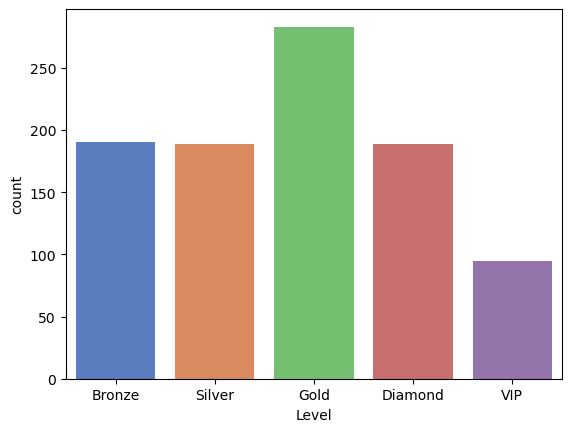

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=co_df, palette='muted', order=order_columns)

In [33]:
co_df

,CustomerID,LatelyDate,LastDate,TotalPayment,OrderCount,TotalScore,Locations,Product,Level
0,1011,2023-05-08,326,1129.02,2,1.421795,London,B,VIP
1,1025,2023-05-20,314,359.29,1,0.796647,New York,D,Gold
2,1029,2023-06-10,293,704.99,1,1.292677,New York,D,VIP
3,1046,2023-04-28,336,859.82,1,0.641413,Paris,B,Gold
4,1049,2023-05-28,306,225.72,1,0.873558,Tokyo,A,Gold
...,...,...,...,...,...,...,...,...,...
941,9941,2023-04-29,335,960.53,1,0.700622,Paris,B,Gold
942,9950,2023-05-03,331,679.11,1,0.648411,Tokyo,C,Gold
943,9954,2023-05-29,305,798.01,1,1.131970,Tokyo,B,Diamond
944,9985,2023-04-14,350,36.10,1,0.060125,New York,D,Bronze


In [34]:
# 데이터값 확인하기
co_df['Locations'].value_counts()

Locations
Tokyo       260
New York    234
London      232
Paris       220
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='OrderCount'>

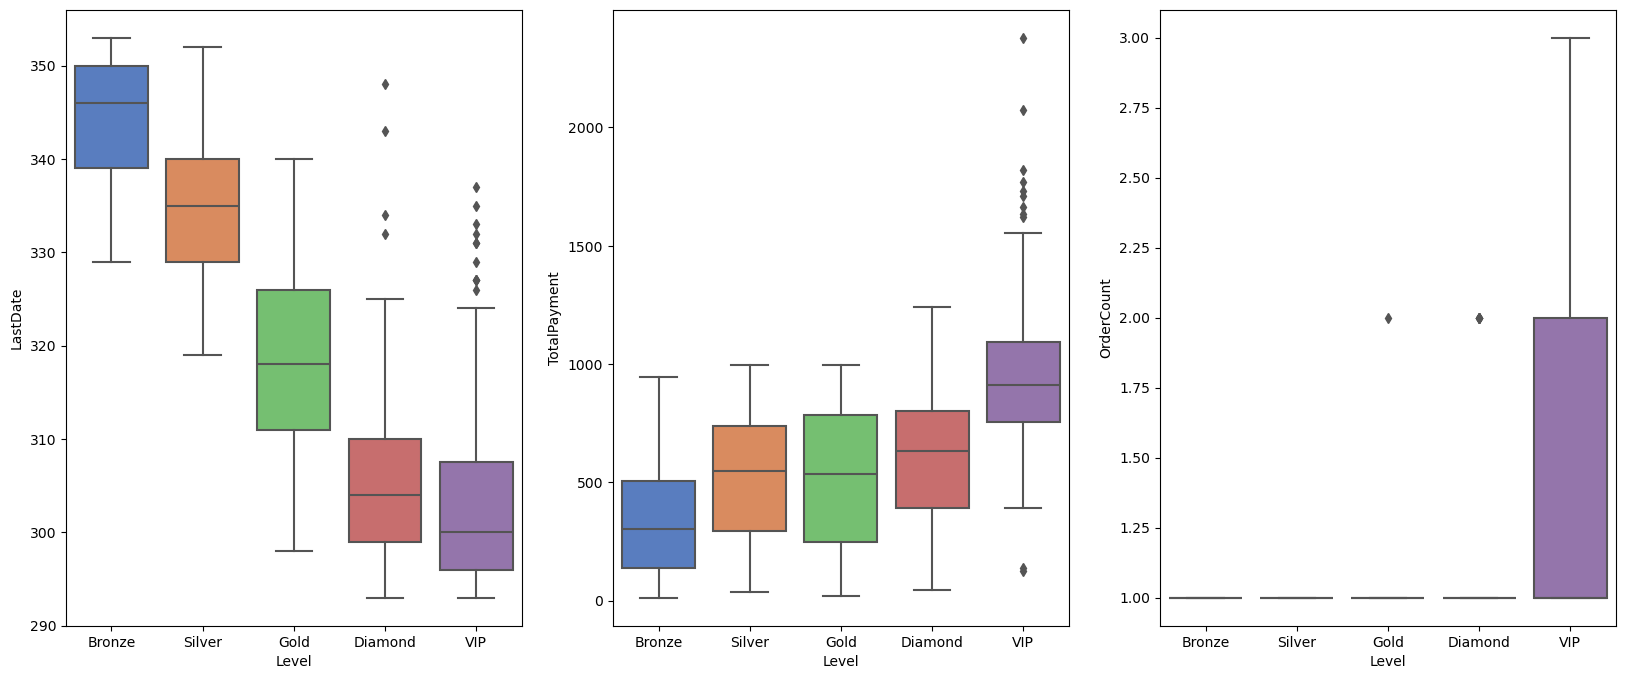

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.boxplot(ax=axes[0], x='Level', y='LastDate', data=co_df, palette='muted', order=order_columns)
sns.boxplot(ax=axes[1], x='Level', y='TotalPayment', data=co_df, palette='muted', order=order_columns)
sns.boxplot(ax=axes[2], x='Level', y='OrderCount', data=co_df, palette='muted', order=order_columns)

In [36]:
# 등급에 Recency, Frequency, Monetary가 얼마나 영향을 미치는지 알아보기 위해 boxplot을 이용하여 시각화 하였다.
# Recency (최근 주문한 날짜) 가 최근일 수록 브론즈 등급의 신규 고객이며, 브이아이피 고객들은 구매 이력이 오래된 사람들이 주를 이룸을 알 수 있었다.
# 또한 브이아이피는 중앙값이 위로 향해 분포의 오른쪽이 길어지는 현상이 나타나며, 다른 등급 대비 기간이 길다는걸 나타낸다.

# Monetary(주문 횟수) 는  VIP를 제외한 나머지 등급들은 대부분이 1번으로 등급을 정하는 rmf에 크게 영향을 미치지 않는다는 것을 보여준다.

<Axes: xlabel='Product', ylabel='count'>

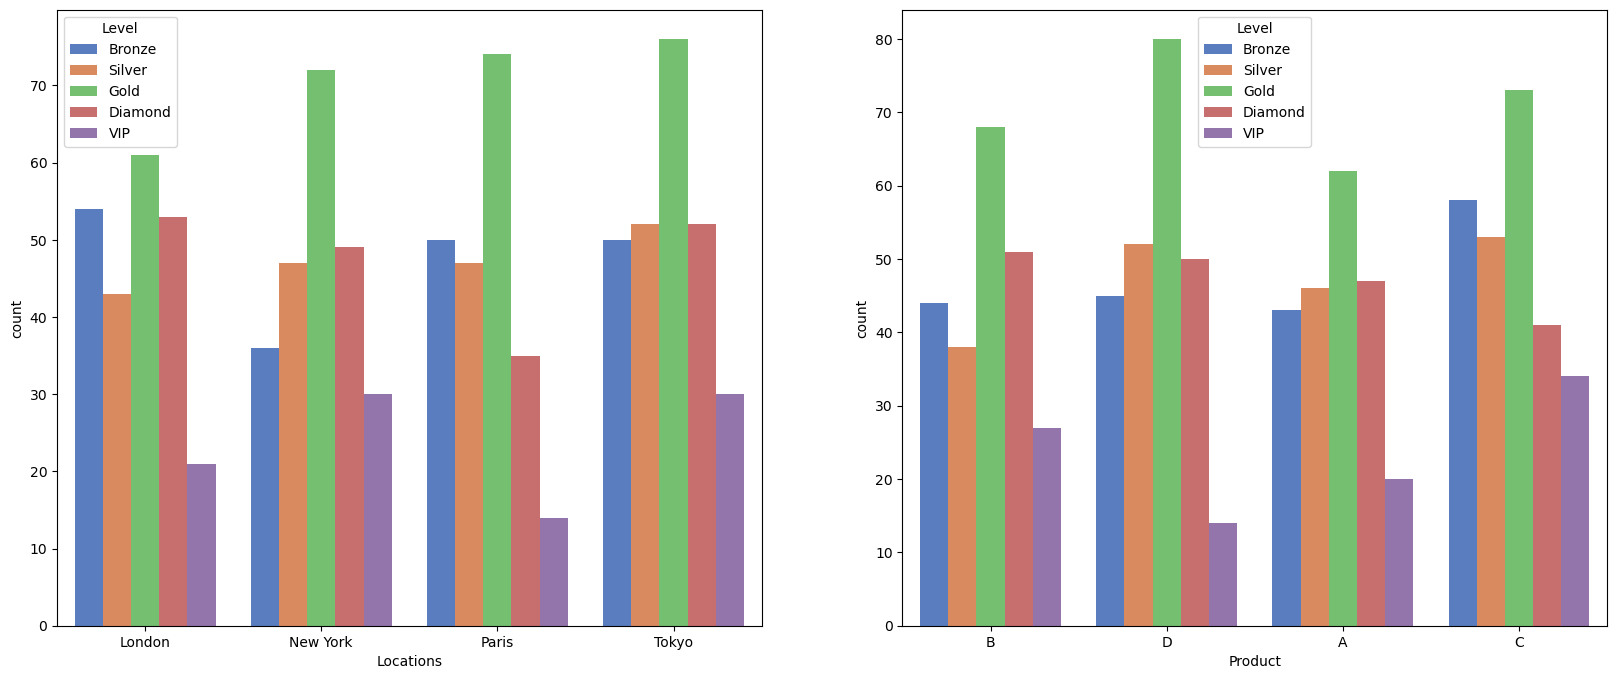

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='Locations', hue='Level', data=co_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Product', hue='Level', data=co_df, palette='muted', hue_order=order_columns)

In [38]:
# 등급에 Recency, Frequency, Monetary가 얼마나 영향을 미치는지 알아보기 위해 boxplot을 이용하여 시각화 하였다.
# Recency (최근 주문한 날짜) 가 최근일 수록 브론즈 등급의 신규 고객이며, 브이아이피 고객들은 구매 이력이 오래된 사람들이 주를 이룸을 알 수 있었다.
# 또한 브이아이피는 중앙값이 위로 향해 분포의 오른쪽이 길어지는 현상이 나타나며, 다른 등급 대비 기간이 길다는걸 나타낸다.

# Monetary(주문 횟수) 는  VIP를 제외한 나머지 등급들은 대부분이 1번으로 등급을 정하는 rmf에 크게 영향을 미치지 않는다는 것을 보여준다.

In [39]:
# 각 등급을 나라별, 상품별 기준으로 수치를 시각화한 그래프이다.
# 나라별로 고객 등급을 봤을 때, 도쿄의 고객이 가장 많았으며 파리의 고객이 가장 수가 적었다.
# 상품은 대부분의 상품 판매량이 비슷하지만 C상품은 다이아몬드 등급, D,A 상품은 브론즈 등급의 고객들의 구매도가 높았다.
# 나라별 마케팅을 진행한다고 하였을 때,
# 런던은 다른 등급 대비 골드의 비중이 제일 높은 나라이다.
# 이는 최근에 방문했거나, 큰 금액을 구매한 고객들이 많다는 뜻으로 신규 고객보다는 기존 고객을 대상으로 한 프로모션을 진행하는 것이 좋다. 
# 뉴욕은 네 나라중 가장 고객의 등급이 고르게 분포되어있는 나라이다. 때문에 전체 등급을 대상으로 하는 쿠폰이나 프로모션을 진행한다면 고객의 재구매를 유도할 수 있을 것이다.
# 파리는 네 나라중 고객이 적음에도 불구하고 골드 다음으로 다이아몬드 등급이 많은 특징을 가지고 있다.
# 때문에 높은 등급을 대상으로 한 프로모션을 진행했을 때 브이아이피 고객을 만들 수 있을 확률이 높으며 다이아몬드 등급에게 인기가 좋은 C 상품을 적극 판매하면 좋다.
# 도쿄는 브론즈가 전체 고객 대비 비중이 나라중 제일 높은 편이다. 때문에 브론즈 등급을 대상으로 할 수 있는 프로모션을 진행했을 때 재구매 고객을 유치할 수 있을 것이다.

#### 🚨 RFM 분석

- 등급에 RFM이 각각 미치는 영향을 알아보기 위해 시각화한 boxplot을 보았을 때, 최근 주문한 날짜가 최근일 수록 Bronze 등급의 신규 고객이며,
  VIP 고객들은 구매 이력이 오래된 사람들이 주를 이루고 있는 것을 나타냈다.  
- VIP 고객의 경우 중앙값이 위로 항해 분포의 오른쪽이 길어지는 현상이 나타나며, 이는 다른 등급 대비 주문 날짜가 상대적으로 길다는 것을 나타낸다.  
- 때문에 VIP 고객보다 낮은 등급의 고객들을 위주로 전략을 세우는 것이 충성 고객을 만들 확률이 높다.  
- 또한 주문 횟수는 VIP 고객을 제외한 나머지 등급들은 대부분이 1번 이하로 등급을 정하는 요인에 크게 영향을 미치지 않는다는 것을 보여준다.  
- 나라별로 고객 등급을 봤을 때, 도쿄 고객이 가장 많았으며 파리의 고객 수가 가장 적음을 나타낸다.  
- 상품은 대부분 판매량이 비슷하지만 C상품은 다이아몬드 등급, D, A 상품은 브론즈 등급 고객들의 구매도가 높은 것을 나타낸다.  

#### 🚨 결론
- 구매 횟수가 1번인 고객을 대상으로 전략을 세우는 것이 충성 고객을 만들 수 있는 확률이 높다.  
- 전체 나라를 대상으로 할 때에는 Gold 등급을 대상으로 하는 프로모션을 열었을 때 재구매 확률이 높을 것이다.  
- 나라별로 다른 정책을 적용할때,
  Gold 등급 다음으로 Diamond 등급이 많은 파리의 경우 Diamond등급에게 인기가 좋은 C 상품을 대상으로한 전략 마케팅을 줬을때 기존 고객을 충성 고객인 Vip 고객으로 유도할 수 있을 확률이 있다.  
  또한 도쿄는 Bronze 등급과 Silver등급의 격차가 제일 높은 나라로 한 번 구매하거나 방문한 고객의 재방문율이 낮을 확률이 있다. 때문에 재방문 쿠폰을 통해 플랫폼 재유입을 유도하는 전략을 세울 수 있다.  